## Курсовой проект Python

<aside>
🧑🏻‍💻 В компании SkyCrossroads запущена рекламная акция:

Клиент может получить дополнительные баллы лояльности за покупку, совершенную в течение ограниченного периода.

Классическая акция подразумевает получение дополнительных 1000 баллов лояльности за покупку от 100 рублей. 

Было решено запустить АБ Тест, в котором в тестовой группе предлагается в два раза больше баллов лояльности за покупку от 100 рублей. 

Эксперимент был проведен в нескольких торговых точках, которые в датасете представлены столбцом id_point. Также в датасете есть информация о том, как долго клиент зарегистрирован у нас в программе лояльности.

Вам поступил запрос от отдела маркетинга:

- Рассчитать результаты эксперимента в целом и в отдельности по каждой торговой точке
- Вынести решение об эффективности воздействия Б по сравнению с воздействием А
- Сделать сегментацию пользователей с точки зрения длительности регистрации в программе лояльности
</aside>

## Как подключиться к данным

Данные представлены в следующем файле:

[Dataset_AB_TEST.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0aa1817e-3460-44b4-96bc-92cbea7d19be/Dataset_AB_TEST.csv)

- **Расшифровка данных**
    
    **id_client** - уникальный id клиента
    
    **id_group** - контроль (1000 баллов лояльности) / тест (2000 баллов лояльности)
    
    **sum_pay** - сумма, на которую была совершена покупка
    
    **id_point** - id торговой точки
    
    **months_reg** - длительность регистрации клиента в программе лояльности

# Часть 1. Создание статистических функций

### Задача 1

Постройте в Python функцию **statistical_analysis**, которая будет проводить анализ выборки. 

**На вход она берет:**

- один ряд ***r*** в формате «список» (*list*) или «кортеж» (*tuple*). Это ряд, который необходимо исследовать.
- один ряд ***q*** в формате «список» (*list*). Это ряд квантильных порогов, для которых необходимо вычислить квантильные значения ряда ***r***. Аргумент ***q*** должен иметь значение по умолчанию *q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]* (но при желании значение ряда ***q*** можно было бы заменить)

**И делает следующие шаги:**

1. Проводит проверку на тип данных ряда : если тип данных ряда ***r*** не «список» (*list*) или «кортеж» (*tuple*), то выводит ошибку «Нужен список или кортеж!»  
2. Проводит проверку на длину ряда ***r***: если в нём 4 наблюдения или меньше, то выдает ошибку «Требуется более длинный ряд».
3. Проводит преобразование типа данных «список» (*list*) или «кортеж» (*tuple*) в тип данных Series (*pandas*).
4. Для ряда выводит (с помощью *print* и расшифровки) среднее (метод Series “*mean*”), дисперсию (метод Series “*var*”), стандартное отклонение (метод Series “*std*”).
    
    Также записывает эти значения во внутренние переменные и возвращает эти переменные в *return*.
    
5. С помощью функции *quantile* из библиотеки *numpy* функция рассчитывает и записывает в отдельную переменную ***qs*** список из квантилей, соответствующих квантильным порогам из ***q***. 
    
    Можно прочитать документацию функции *quantile:* [https://numpy.org/doc/stable/reference/generated/numpy.quantile.html](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)
    
    Ряд ***qs*** также должен быть в return функции (вместе со средним, дисперсией и стандартным отклонением из пункта-4).
    
6. Оформляет принт результатов квантильного анализа. Для этого необходимо проверить, есть ли среди указанных в аргументе квантильных порогов те, что соответствуют ***медиане***, ***квартилям*** или ***децилям***. Если такие квантильные пороги есть, то для каждого из них оформите print с указанием квантильного порога и его значения.
7. Для ряда функция **statistical_analysis** строит гистограмму с помощью библиотеки *seaborn*.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def statistical_analysis(r, q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    if (type(r) is not list) & (type(r) is not tuple):
        print('Нужен список или кортеж')
        return
    
    if len(r)<= 4:
        print('Требуется более длинный ряд')
        return
    
    r = pd.Series(r)
    m = r.mean()
    s = r.std()
    v = r.var()
    
    print('Среднее ряда = ' , m)
    print('Дисперсия ряда = ' , v)
    print('Стандартное отклонение ряда = ' , s)
    print()
    
    qs = np.quantile(r, q)
    
    for i in range(len(q)):
        if q[i]==0.5:
            print('Медиана = ', qs[i])
        elif q[i]==0.25:
            print('1st quantile = ', qs[i])
        elif q[i]==0.75:
            print('3rd quantile = ', qs[i])
        elif q[i]*100 % 10==0:
            print('Decile number ',q[i]*10,'=', qs[i])
        else: print('Quantile ',q[i],'=', qs[i])
            
    sns.histplot(data = r)
        
    return(m, v, s, qs)

### Задача 2

Постройте в Python функцию ***test_calc***, которая будет проводить t-тест на равенство средних двух выборок. 

**На вход она берет:**

- Ряд 1 (***r1***)
- Ряд 2 (***r2***)
- Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

**И делает следующие шаги:**

1. Вычисляет значение *t-критерия* и его *p_value* по сравнению средних значений рядов ***r1*** и ***r2.*** Лучше всего воспользоваться функцией *ttest_ind* из библиотеки *scipy.stats.* Эти значения сохраняются во внутренние переменные (значение t-критерия в переменную ***s,*** p_value в переменную ***p***).
2. Возвращает (*return*) переменные ***s*** и ***p***.
3. Оформляет принт результатов, принимается ли нулевая гипотеза о равенстве средних или нет на основании сравнения полученного *p_value* (переменная ***р***) и аргумента ***alpha.***

In [ ]:
from scipy import stats
from scipy.stats import norm, ttest_ind, mannwhitneyu

In [ ]:
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1, r2)
    
    if p < alpha:
        print('Нулевая гипотеза не подтверждается - средние не равны')
        print('Разница средних = ', r1.mean()-r2.mean())
    else:
        print('Нулевая гипотеза подтверждается - средние равны')
        print('Разница средних = 0')
        
    return s, p
        

### Задача 3

Постройте в Python функцию **mann_whitney_func**, которая будет проводить тест Манна-Уитни для двух выборок.

**На вход она берет:**

- Ряд 1 (***r1***)
- Ряд 2 (***r2***)
- Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)

**И делает следующие шаги:**

1. Вычисляет значение статистики Манна — Уитни и p_value нулевой гипотезы теста Манна-Уитни. Значение статистики записывается во внутреннюю переменную ***s***, а *p_value* - во внутреннюю переменную ***p***.
2. Принт результата в зависимости от соотношения p_value и alpha («Распределения (не) равны»).
3. Возвращает (в *return*) — внутренние переменные ***s*** и ***p***.

In [ ]:
def mann_whitney_func(r1, r2, alpha = 0.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
                
    return s, p    

# Часть 2. Расчет A/B теста

### Задача 1

**Проведите общий анализ A/B Теста**

1. С помощью функции *read-csv* импортните csv файл с датасетом.
2. Исследуйте данные. Проведите очистку данных от нуллов и выбросов (для очистки от выбросов  используйте созданную в первом шаге функцию ***statistical_analysis***).
3. Создайте функцию для визуализации ***show_hist***, которая имеет следующие аргументы:
    - ***r1*** (первый ряд для визуализации)
    - ***r2*** (второй ряд для визуализации)
    - ***graph_titile*** (Строка-название графика)
    - ***xlabel*** (подпись оси Х с дефолтным значением “*Размер платежа*”)
    - ***ylabel*** (подпись оси Y с дефолтным значением “*Кол-во людей*”)
    
    Функция должна с помощью библиотеки ***seaborn*** строить гистограмму для каждого из рядов (вместе на одном графике) и подписывать график (***graph_titile)*** и оси ***(xlabel, ylabel)***.
    
4. Проведите визуализацию с помощью функции ***show_hist*** для сравнения результатов в А и В группе.
5. Посмотрите на результаты параметрического и непараметрического теста (используйте созданные в первой шаге функции ***mann_whitney_func*** и ***test_calc***).
6. Сделайте выводы.

In [ ]:
df = pd.read_csv('Dataset_AB_TEST.csv', sep=';')
df.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [ ]:
df.describe()

,id_client,sum_pay,id_point,months_reg
count,1.097600e+04,10849.000000,10895.000000,10976.000000
mean,1.373018e+06,3568.751037,1180.040385,4.717566
std,1.477359e+04,2927.164583,4.345107,3.185566
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361744e+06,1251.000000,1178.000000,2.000000
50%,1.370690e+06,3173.000000,1179.000000,4.000000
75%,1.373433e+06,5358.000000,1179.000000,7.000000
max,1.420345e+06,24797.000000,1199.000000,14.000000


In [ ]:
df.groupby('id_group').count()

,id_client,sum_pay,id_point,months_reg
id_group,,,,
control,5202,5175,5198,5202
test,5700,5673,5696,5700


In [ ]:
len(df[df['id_group'].isnull()])

74

In [ ]:
len(df[df['sum_pay'].isnull()])

127

In [ ]:
len(df[df['id_point'].isnull()])

81

In [ ]:
len(df[df['months_reg'].isnull()])

0

In [ ]:
df = df[(~df['id_group'].isnull()) & (~df['sum_pay'].isnull()) & (~df['id_point'].isnull())]

Среднее ряда =  3568.7580258302582
Дисперсия ряда =  8568932.941996625
Стандартное отклонение ряда =  2927.27397795229

Decile number  1.0 = 410.0
1st quantile =  1250.75
Decile number  3.0 = 1590.0
Decile number  4.0 = 2329.6000000000004
Медиана =  3173.5
Decile number  6.0 = 3934.0
3rd quantile =  5356.5
Decile number  9.0 = 7088.200000000001
Quantile  0.95 = 7805.0999999999985
Quantile  0.96 = 8041.0
Quantile  0.97 = 8453.64
Quantile  0.98 = 9043.659999999998
Quantile  0.99 = 9809.76000000001
Quantile  0.995 = 21046.075000000004


(3568.7580258302582,
 8568932.941996625,
 2927.27397795229,
 array([  410.   ,  1250.75 ,  1590.   ,  2329.6  ,  3173.5  ,  3934.   ,
         5356.5  ,  7088.2  ,  7805.1  ,  8041.   ,  8453.64 ,  9043.66 ,
         9809.76 , 21046.075]))

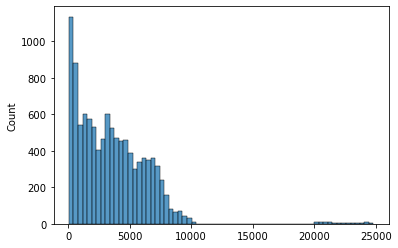

In [ ]:

statistical_analysis(tuple(df['sum_pay']), q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9,0.95,0.96,0.97,0.98,0.99,0.995])

In [ ]:
df = df[df['sum_pay']<20000]

In [ ]:
df_A = df[df['id_group']=='control']
df_B = df[df['id_group']=='test']

In [ ]:
def show_hist(r1, r2, graph_title, xlabel='Размер платежа', ylabel = 'Кол-во людей'):
    sns.set(rc={'figure.figsize':(12,9)})
    ax1 = sns.histplot(r1, color='blue')
    ax2 = sns.histplot(r2, color='orange')
    ax1.set(xlabel=xlabel, ylabel=ylabel)
    plt.title(graph_title)
    plt.show()

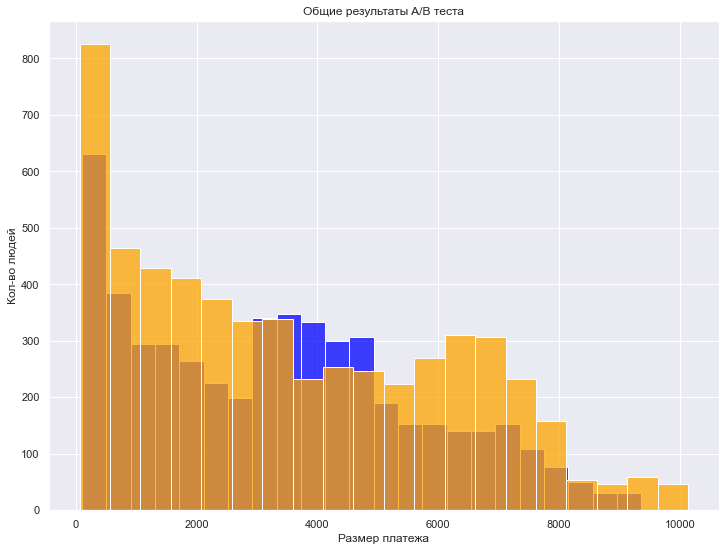

In [ ]:
show_hist(df_A['sum_pay'], df_B['sum_pay'], 'Общие результаты A/B теста')

In [ ]:
mann_whitney_func(df_A['sum_pay'], df_B['sum_pay'])

Распределения равны


(14141330.5, 0.05842125879702285)

In [ ]:
test_calc(df_A['sum_pay'], df_B['sum_pay'])

Нулевая гипотеза не подтверждается - средние не равны
Разница средних =  -175.82591504758784


(-3.7141912292177888, 0.0002048855494553075)

### Задача 2

**Анализ по торговым точкам**

1. Создайте цикл, пробегающий по всем уникальным торговым точкам.
2. Для каждой торговой точки проведите визуализацию с помощью гистограммы для сравнения результатов в А и В группе (используйте функцию ***show_hist).***
3. Для каждой торговой точки посмотрите на результаты параметрического и непараметрического теста для сравнения групп А и В (используйте функции ***mann_whitney_func*** и ***test_calc***).
4. Убедитесь, что в торговых точках, по которым вы делаете выводы, достаточное количество наблюдений.
5. Для каждой торговой точки с достаточным количеством наблюдений сделайте выводы.

Анализ точки 1199.0


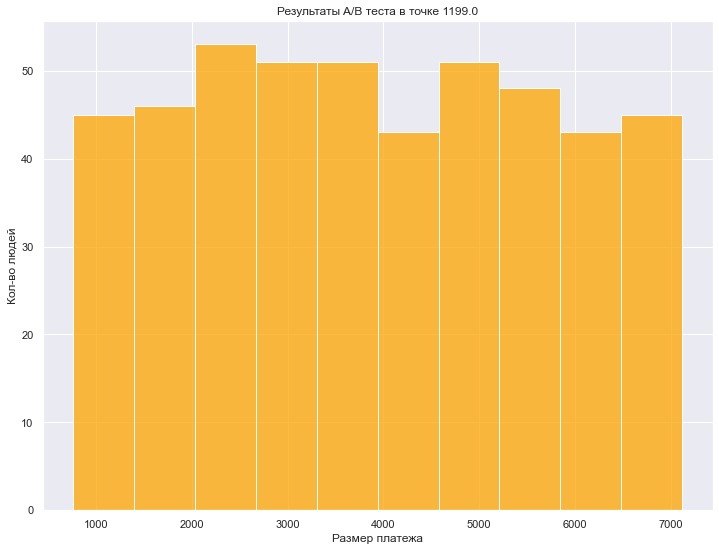

Нет ни одного наблюдения для одной из групп в данной торговой точке
Анализ точки 1182.0


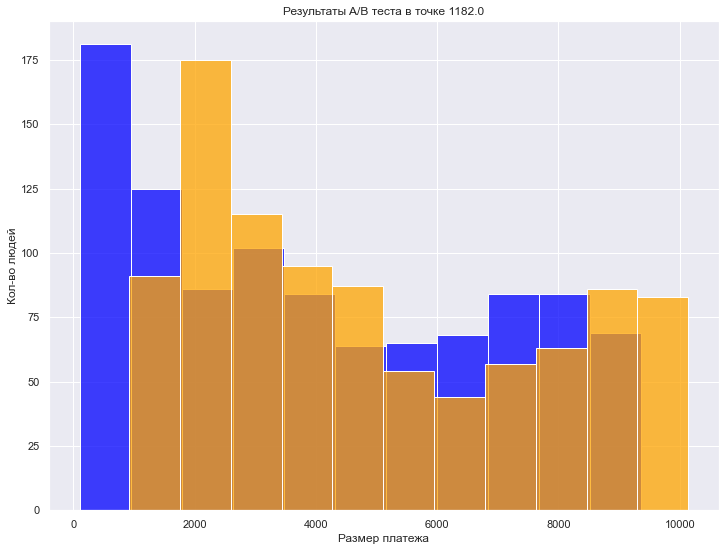

Нулевая гипотеза не подтверждается - средние не равны
Разница средних =  -908.1867859371746

Распределения не равны


Анализ точки 1178.0


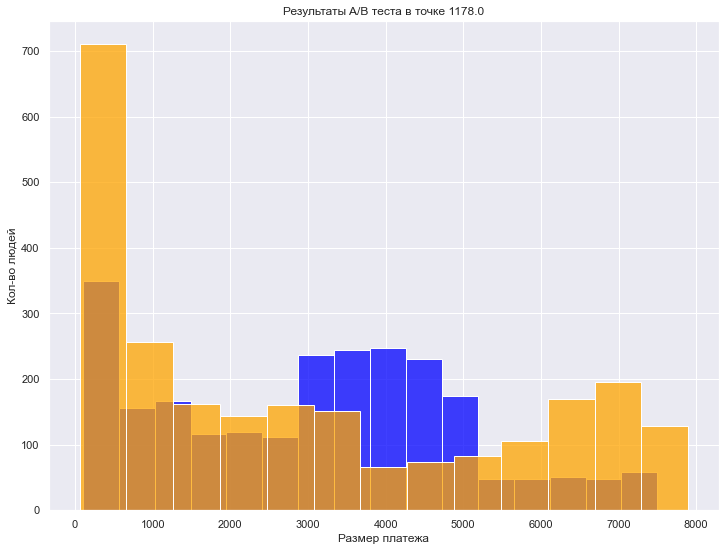

Нулевая гипотеза подтверждается - средние равны
Разница средних = 0

Распределения не равны


Анализ точки 1179.0


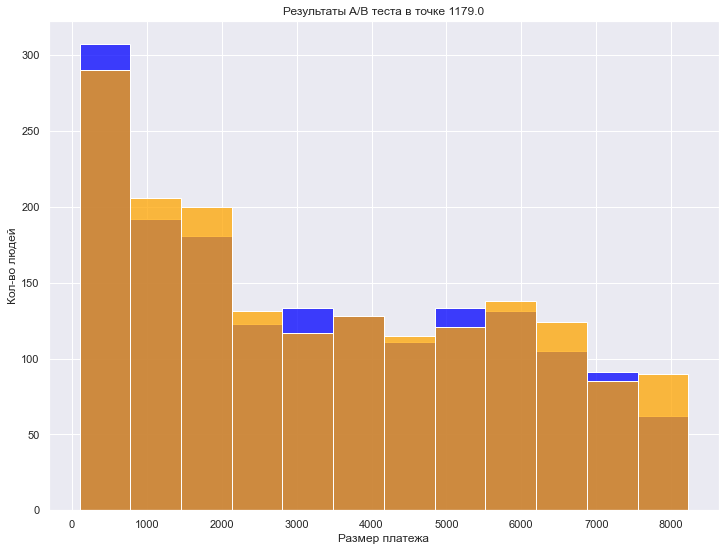

Нулевая гипотеза подтверждается - средние равны
Разница средних = 0

Распределения равны


Анализ точки 1186.0


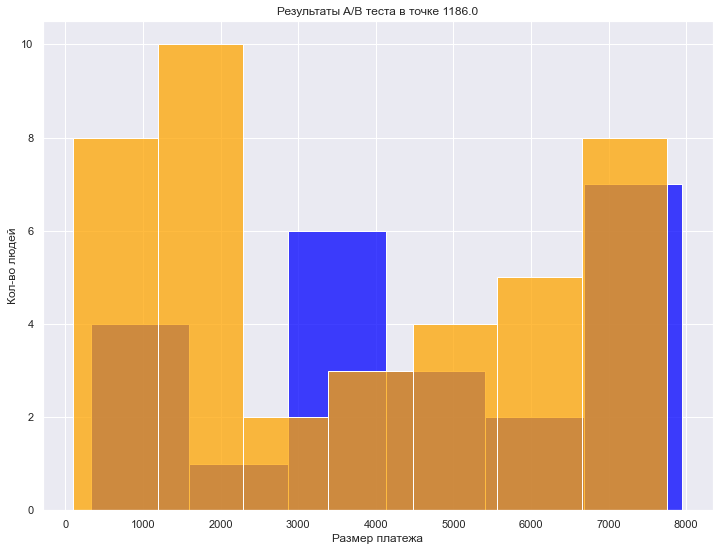

Нулевая гипотеза подтверждается - средние равны
Разница средних = 0

Распределения равны


Анализ точки 1188.0


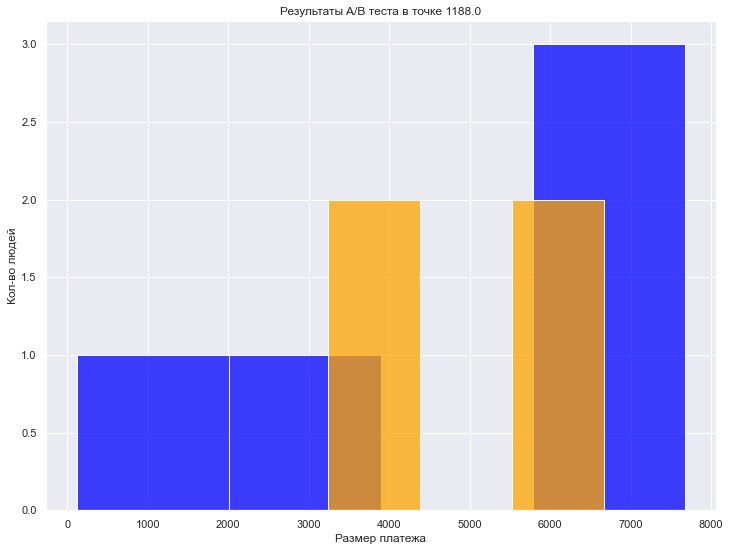

Нулевая гипотеза подтверждается - средние равны
Разница средних = 0

Распределения равны




In [ ]:
for i in df.id_point.unique():
    print('Анализ точки', i)
    df_loc_A = df_A[df_A['id_point']==i]
    df_loc_B = df_B[df_B['id_point']==i]
    
    title_loc = 'Результаты A/B теста в точке ' + str(i)
    
    show_hist(df_loc_A['sum_pay'], df_loc_B['sum_pay'], title_loc)
    
    if df_loc_A['sum_pay'].sum()==0 or df_loc_B['sum_pay'].sum()==0:
        print('Нет ни одного наблюдения для одной из групп в данной торговой точке')
    else:
        test_calc(df_loc_A['sum_pay'], df_loc_B['sum_pay'])
        print()
        mann_whitney_func(df_loc_A['sum_pay'], df_loc_B['sum_pay'])
        print()
        print()
    

# Часть 3. Сегментация и презентация

### Задача 1

**Сегментация по длительности регистрации**

1. Рассмотрите два вида корреляции между выплаченной суммой и длительностью регистрации (корреляция Спирмена и корреляция Пирсона).
2. Постройте *scatterplot* (из библиотеки *seaborn*) для визуализации связи между переменными
3. Как полученные результаты повлияют на ваши бизнес-рекомендации?

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

C:\Users\USMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Корреляция между выплаченной суммой и длительностью регистрации')

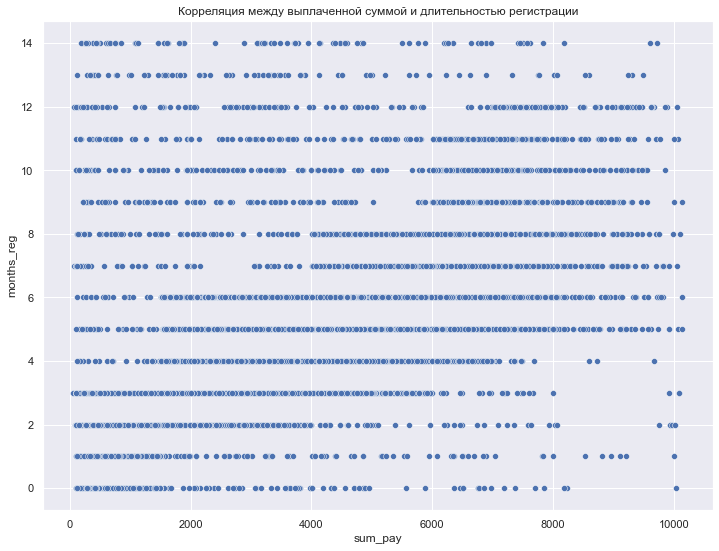

In [ ]:
sns.scatterplot(df['sum_pay'],df['months_reg']).set_title('Корреляция между выплаченной суммой и длительностью регистрации')

In [ ]:
def proxi_ranges(r1, r2, alpha = 0.05):
    cov = np.cov(r1, r2)
    
    print('Ковариация: {:.2f}'.format(cov[0][1]))
    print('Дисперсия для sum_pay: {:.2f}'.format(cov[0][0]))
    print('Дисперсия для months_reg: {:.2f}'.format(cov[1][1]))
    
    pearson_v, pearson_p = pearsonr(r1, r2)
    spearman_v, spearman_p = spearmanr(r1, r2)
    
    if pearson_p < alpha:
        if abs(pearson_v) < 0.3:
            pearson_resolution = 'слабая'
        elif abs(pearson_v) < 0.7:
            pearson_resolution = 'средняя'
        else: pearson_resolution = 'сильная'
        
        print ('Корреляция Пирсона =', round(pearson_v,2), f'{pearson_resolution}')
            
    else: print('Корреляция Пирсона равна нулю')
    print('p_value= ', pearson_p)    
     
    if spearman_p < alpha:
        if abs(spearman_v) < 0.3:
            spearman_resolution = 'слабая'
        elif abs(spearman_v) < 0.7:
            spearman_resolution = 'средняя'
        else: spearman_resolution = 'сильная'
        
        print ('Корреляция Спирмана =', round(spearman_v,2), f'{pearson_resolution}')
            
    else: print('Корреляция Спирмана равна нулю')   
    print('p_value= ', spearman_p)    
    print (cov)

In [ ]:
proxi_ranges(df['sum_pay'],df['months_reg'])

Ковариация: 4652.63
Дисперсия для sum_pay: 6023895.90
Дисперсия для months_reg: 10.04
Корреляция Пирсона = 0.6 средняя
p_value=  0.0
Корреляция Спирмана = 0.65 средняя
p_value=  0.0
[[6.02389590e+06 4.65262789e+03]
 [4.65262789e+03 1.00395825e+01]]


In [ ]:
Делаем вывод о наличии средней кореляции между длительностью регистрации клиента в системе лояльности и выплаченной суммой. 
Следовательно необходимо какую-то часть маркетинговых ресурсов направлять на удержание клиентов.